In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tsfresh import extract_features
from tsfresh.feature_extraction.settings import EfficientFCParameters, MinimalFCParameters


## load data

In [79]:
data = pd.read_csv("../R/data.csv")
param = pd.read_csv("../R/theta.csv")

In [80]:
data = data.drop(["Unnamed: 0"], 1)
param = param.drop(["Unnamed: 0"], 1)

## mold the data into the correct format

In [81]:
def datamold(df):
    N_data = df.shape[0]
    size_y = df.shape[1]

    # for tsfresh!
    time = np.tile(range(size_y),N_data)
    index = np.repeat(range(N_data),size_y)
    
    df_new = pd.DataFrame(data.T.unstack().reset_index())
    df_new.columns = ["id", "time", "y"]   
    df_new["time"] = time
    return(df_new)

In [82]:
data_ts = datamold(data)

## feature the data

In [83]:
default_fc_parameters = EfficientFCParameters()
data_ss = extract_features(data_ts, column_id="id", column_sort="time",
                           default_fc_parameters=default_fc_parameters)

Feature Extraction: 100%|██████████| 20/20 [00:29<00:00,  1.05it/s]


### clean the features

In [84]:
import tsfresh.transformers.per_column_imputer as PCI

pci_trans = PCI.PerColumnImputer()
data_ss_pci = pci_trans.fit_transform(data_ss)

 'y__fft_coefficient__coeff_51__attr_"angle"'
 'y__fft_coefficient__coeff_51__attr_"imag"'
 'y__fft_coefficient__coeff_51__attr_"real"'
 'y__fft_coefficient__coeff_52__attr_"abs"'
 'y__fft_coefficient__coeff_52__attr_"angle"'
 'y__fft_coefficient__coeff_52__attr_"imag"'
 'y__fft_coefficient__coeff_52__attr_"real"'
 'y__fft_coefficient__coeff_53__attr_"abs"'
 'y__fft_coefficient__coeff_53__attr_"angle"'
 'y__fft_coefficient__coeff_53__attr_"imag"'
 'y__fft_coefficient__coeff_53__attr_"real"'
 'y__fft_coefficient__coeff_54__attr_"abs"'
 'y__fft_coefficient__coeff_54__attr_"angle"'
 'y__fft_coefficient__coeff_54__attr_"imag"'
 'y__fft_coefficient__coeff_54__attr_"real"'
 'y__fft_coefficient__coeff_55__attr_"abs"'
 'y__fft_coefficient__coeff_55__attr_"angle"'
 'y__fft_coefficient__coeff_55__attr_"imag"'
 'y__fft_coefficient__coeff_55__attr_"real"'
 'y__fft_coefficient__coeff_56__attr_"abs"'
 'y__fft_coefficient__coeff_56__attr_"angle"'
 'y__fft_coefficient__coeff_56__attr_"imag"'
 'y__fft_

## split the data

In [48]:
from sklearn.model_selection import train_test_split

In [85]:
## assume same train/test split for all parameters
X_train, X_test, y_train, y_test = train_test_split(data_ss_pci, param.iloc[:,0], 
                                                        test_size=0.3,
                                                        random_state=0)
y_train_1 = y_train
y_test_1 = y_test

y_train_2 = param.iloc[y_train.index,1]
y_test_2 = param.iloc[y_test.index,1]

y_train_3 = param.iloc[y_train.index,2]
y_test_3 = param.iloc[y_test.index,2]

## fit data, RF

In [60]:
from sklearn.ensemble import RandomForestRegressor

In [90]:
model_1 = RandomForestRegressor(random_state=0, n_estimators=10)
model_1.fit(X_train,y_train_1)
theta_hat_1 = model_1.predict(X_test)

model_2 = RandomForestRegressor(random_state=0, n_estimators=10)
model_2.fit(X_train,y_train_2)
theta_hat_2 = model_2.predict(X_test)

model_3 = RandomForestRegressor(random_state=0, n_estimators=10)
model_3.fit(X_train,y_train_3)
theta_hat_3 = model_3.predict(X_test)

### evaluate the preditor

Text(0.5, 1.0, 'beta')

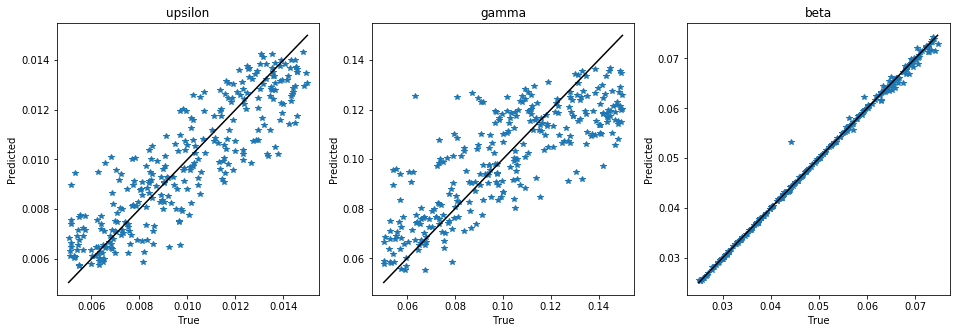

In [92]:
plt.figure(figsize=[16,5])
plt.subplot(1,3,1)
plt.plot(y_test_1, theta_hat_1, '*')
plt.plot([y_test_1.min(), y_test_1.max()],[y_test_1.min(), y_test_1.max()],'k-')
plt.xlabel("True")
plt.ylabel("Predicted")
plt.title("upsilon")

plt.subplot(1,3,2)
plt.plot(y_test_2, theta_hat_2, '*')
plt.plot([y_test_2.min(), y_test_2.max()],[y_test_2.min(), y_test_2.max()],'k-')
plt.xlabel("True")
plt.ylabel("Predicted")
plt.title("gamma")

plt.subplot(1,3,3)
plt.plot(y_test_3, theta_hat_3, '*')
plt.plot([y_test_3.min(), y_test_3.max()],[y_test_3.min(), y_test_3.max()],'k-')
plt.xlabel("True")
plt.ylabel("Predicted")
plt.title("beta")

In [88]:
def plotFI(N, feature_names, model):
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1][:N]

    # Plot the feature importances of the forest
    plt.figure(figsize=[10,10])
    plt.title("Feature importances")
    plt.barh(feature_names[indices], importances[indices],
           color="r", align="center")

    plt.show()

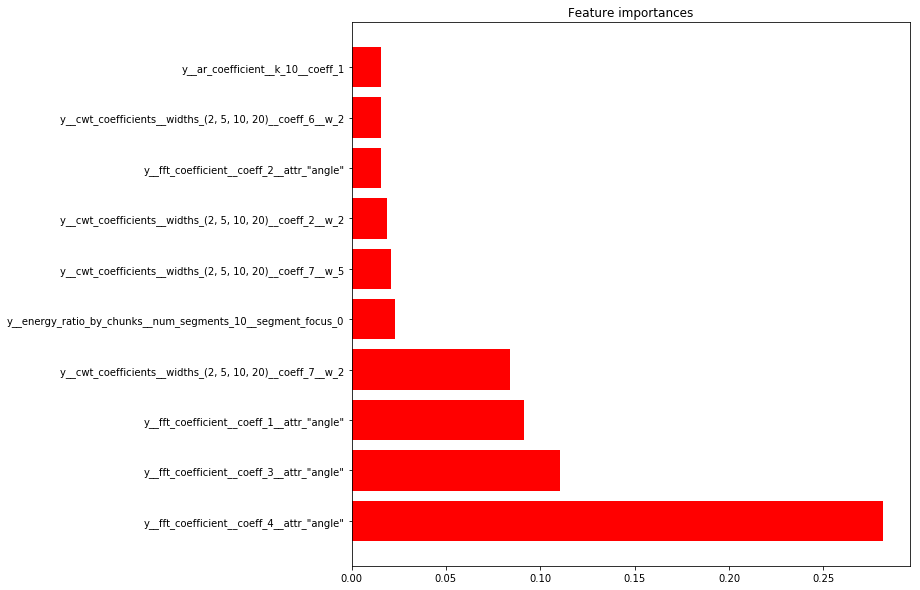

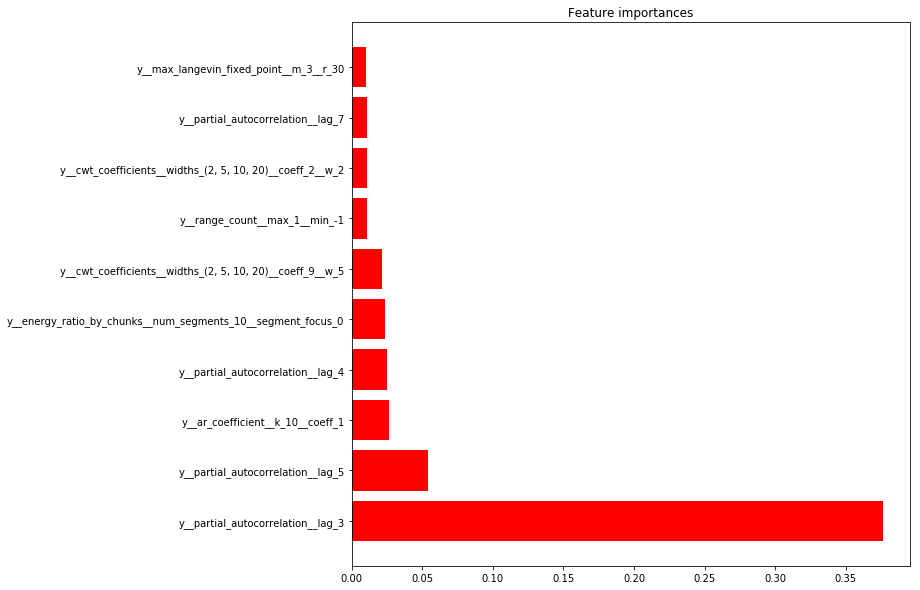

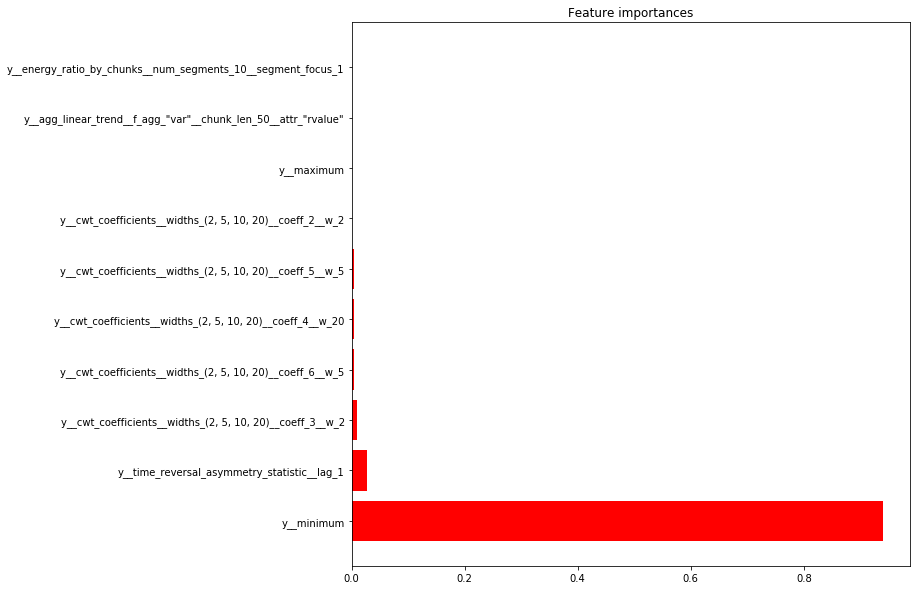

In [93]:
plotFI(10,data_ss_pci.columns, model_1)
plotFI(10,data_ss_pci.columns, model_2)
plotFI(10,data_ss_pci.columns, model_3)